In [1]:
import vk 
import json

In [2]:
token = "63e163d363e163d363e163d3af63929ca4663e163e163d33c849b30d5a14a8ec695bb76"  # Сервисный ключ доступа
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)

In [3]:
personal_token = "694665bc9f22c8045de619f7b0b7221abeacf1946fa2a4b15e22b5537b1d4bda98761659cc5f127a86d3e"  # Персональный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=personal_token)  # Авторизация
vk_personal_api = vk.API(session) 

In [4]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
    return data

In [5]:
members_m = get_members("trmuzik")

In [6]:
len (members_m)

221152

In [7]:
members_s = get_members("hercaiturksinema")

In [8]:
len (members_s)

306797

In [9]:
members_s1 = get_members("dizimania")

In [10]:
len (members_s1)

156747

In [11]:
members_s2 = get_members("diziturk")

In [12]:
len (members_s2)

199100

In [13]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учатника
            last_name = member["last_name"] # находим фамилию учатника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [14]:
save_members_to_file ("trmuzik.tsv", members_m)

In [15]:
save_members_to_file ("hercaiturksinema.tsv",members_s)

In [16]:
save_members_to_file ("dizimania.tsv",members_s1)

In [17]:
save_members_to_file ("diziturk.tsv",members_s2)

In [18]:
with open("../project_vasileva-main/trmuzik.tsv", 'r', encoding='utf-8') as f:
    members_m = f.read().split("\n")
    
with open("../project_vasileva-main/hercaiturksinema.tsv", 'r', encoding='utf-8') as f:
    members_s = f.read().split("\n")
    
with open("../project_vasileva-main/dizimania.tsv", 'r', encoding='utf-8') as f:
    members_s1 = f.read().split("\n")

with open("../project_vasileva-main/diziturk.tsv", 'r', encoding='utf-8') as f:
    members_s2 = f.read().split("\n")

In [19]:
members_m = set(members_m)
members_s= set(members_s)
members_s1 = set(members_s1)
members_s2 = set(members_s2)

members_s2.remove("")

In [20]:
united_members = members_s.union(members_s1).union(members_s2)

In [21]:
len (united_members)

595905

In [34]:
with open ("united_members.tsv", "w",  encoding='utf-8') as f:
    for i in united_members:
        f.write(i + "\n")

In [28]:
intersected_members = members_s.intersection(members_s1).intersection(members_s2)

In [29]:
len (intersected_members)

7452

In [37]:
unique_members_s = united_members - intersected_members

In [38]:
len (unique_members_s)

588453

In [39]:
with open ("unique_members_s.tsv", "w",  encoding='utf-8') as f:
    for i in united_members:
        f.write(i + "\n")

In [40]:
intersected_members_m = members_m.intersection(unique_members_s)

In [41]:
len (intersected_members_m)

33742

In [42]:
with open ("intersected_members_m.tsv", "w",  encoding='utf-8') as f:
    for i in united_members:
        f.write(i + "\n")

In [44]:
!pip install matplotlib-venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32061 sha256=bd933524a662b8b4d74dc8dfe5ff839b19aac01cff3f1a0b53323384f72250c5
  Stored in directory: /Users/ekaterinavasileva/Library/Caches/pip/wheels/82/e4/64/dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
Successfully built matplotlib-venn


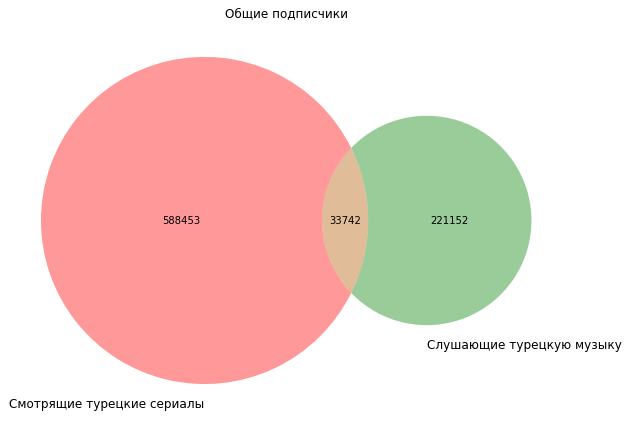

In [48]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn2_circles
plt.figure(figsize=(10,10))
venn2 (subsets = (588453, 221152, 33742), set_labels = ('Смотрящие турецкие сериалы', 'Слушающие турецкую музыку'))
plt.title("Общие подписчики")


plt.show()

In [55]:
city_count = df['city'].value_counts().drop('-') 
city_count = city_count [:20]
print(city_count)

Moscow               43066
Almaty               14319
Saint Petersburg     11038
Nur-Sultan/Astana     6164
Kazan                 4994
Shymkent              4782
Kyiv                  4640
Krasnodar             3968
Makhachkala           3930
Rostov-on-Don         3234
Ufa                   3100
İstanbul              2643
Yekaterinburg         2487
Aktobe                2359
Odessa                2304
Karaganda             2181
Minsk                 2078
Novosibirsk           2077
Grozny                2077
Atyrau                2046
Name: city, dtype: int64


In [52]:
import seaborn as sns

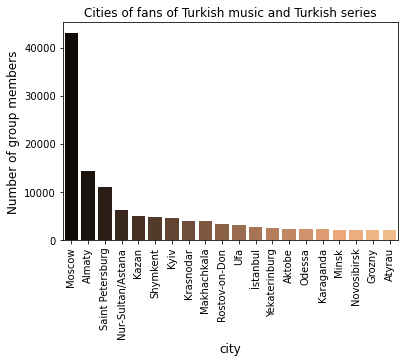

In [57]:
sns.barplot(city_count.index, city_count.values, palette='copper') 
plt.title('Cities of fans of Turkish music and Turkish series')
plt.ylabel('Number of group members', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90) 
plt.show()

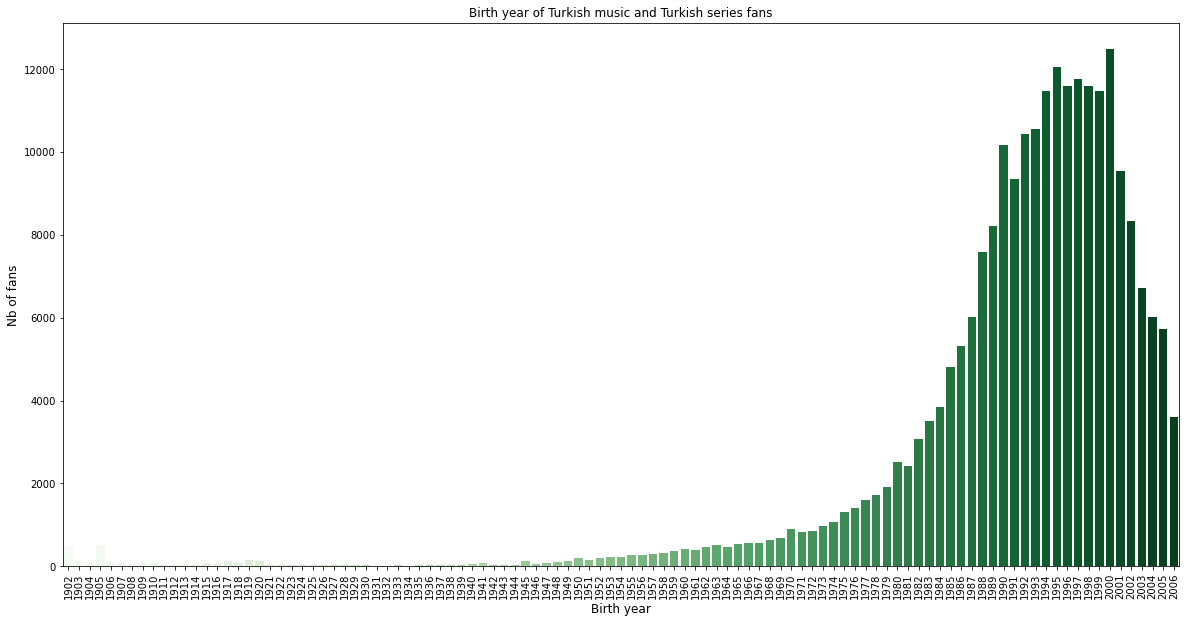

In [59]:
birth_count  = df['birth'].value_counts().drop('-') 
plt.figure(figsize=(20,10))
ax = sns.barplot(birth_count.index, birth_count.values, palette='Greens') 
plt.title('Birth year of Turkish music and Turkish series fans')
plt.ylabel('Nb of fans', fontsize=12)
plt.xlabel('Birth year', fontsize=12)
plt.xticks(rotation=90) 
plt.show() 